In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.utils.data as Data
import matplotlib.pyplot as plt
# Hyper Parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST Dataset 
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),  
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

In [2]:
# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)
test_y=test_dataset.targets

In [3]:
# Neural Network Model (1 hidden layer)
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
    
net = Net(input_size, hidden_size, num_classes)

In [4]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)  

# 常见损失函数

### 交叉熵损失函数
torch.nn.functional.cross_entropy(input, target, weight = None, size_average=True)
### KL散度损失函数
torch.nn.functional.kl_div(input, target, size_average=True)
### 负log likelihood 损失函数
torch.nn.functional.nll_loss(input, target, weight=True)
m_optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

In [5]:
# Train the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Convert torch tensor to Variable
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data.item()))

Epoch [1/5], Step [100/600], Loss: 0.3348
Epoch [1/5], Step [200/600], Loss: 0.2586
Epoch [1/5], Step [300/600], Loss: 0.1902
Epoch [1/5], Step [400/600], Loss: 0.1549
Epoch [1/5], Step [500/600], Loss: 0.1471
Epoch [1/5], Step [600/600], Loss: 0.2005
Epoch [2/5], Step [100/600], Loss: 0.0548
Epoch [2/5], Step [200/600], Loss: 0.1131
Epoch [2/5], Step [300/600], Loss: 0.0326
Epoch [2/5], Step [400/600], Loss: 0.0896
Epoch [2/5], Step [500/600], Loss: 0.1115
Epoch [2/5], Step [600/600], Loss: 0.1005
Epoch [3/5], Step [100/600], Loss: 0.0555
Epoch [3/5], Step [200/600], Loss: 0.0902
Epoch [3/5], Step [300/600], Loss: 0.0515
Epoch [3/5], Step [400/600], Loss: 0.1314
Epoch [3/5], Step [500/600], Loss: 0.0270
Epoch [3/5], Step [600/600], Loss: 0.0941
Epoch [4/5], Step [100/600], Loss: 0.0625
Epoch [4/5], Step [200/600], Loss: 0.0843
Epoch [4/5], Step [300/600], Loss: 0.0664
Epoch [4/5], Step [400/600], Loss: 0.0209
Epoch [4/5], Step [500/600], Loss: 0.0954
Epoch [4/5], Step [600/600], Loss:

In [6]:
# Test the Model
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 97 %


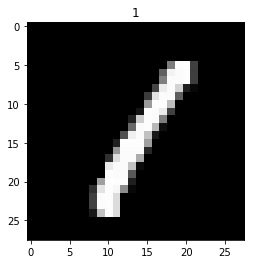

prediction number [8 9 0 1 2 3 4 5 6 7 8 0 1 2 3 4 7 8 9 7]
real number       [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [7]:
# Save the Model
for i in range(1,4):

    plt.imshow(train_dataset.data[i].numpy(), cmap='gray')  

    plt.title('%i' % train_dataset.targets[i])  

plt.show()  
torch.save(net.state_dict(), 'model.pkl')
test_output = net(images[:20])  

pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()  

print('prediction number',pred_y)  

print('real number      ',test_y[:20].numpy())  